In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set()
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from scipy import stats

In [2]:
df = pd.read_csv('number_2_diabetes.csv')

In [3]:
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [4]:
df.shape

(768, 9)

In [5]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [6]:
df.describe(include='all')

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
df = df.drop(['SkinThickness'], axis=1)

In [8]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [9]:
for column in df.columns[0:7]:
    k = 1.5
    [Q1, Q3] = df[column].quantile([0.3, 0.7])
    IQR = Q3 - Q1
    lower_limit = Q1 - k * IQR
    upper_limit = Q3 + k * IQR
    df = df[(df[column] > lower_limit) & (df[column] < upper_limit)]

In [10]:
df.reset_index(drop = True)
df.shape

(499, 8)

In [11]:
def scale(val, min_value, max_value, lower_limit, upper_limit):
    return (((val - min_value) * (upper_limit - lower_limit)) / (max_value - min_value)) + lower_limit

In [12]:
for column in df.columns[0:7]:
    df[column] = scale(df[column], min(df[column]), max(df[column]), 0, 1)
    
df.head(10)

,Pregnancies,Glucose,BloodPressure,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.6,0.747967,0.538462,0.000,0.583333,0.615471,0.90625,1
1,0.1,0.235772,0.423077,0.000,0.318182,0.306054,0.31250,0
3,0.1,0.268293,0.423077,0.376,0.375000,0.099776,0.00000,0
5,0.5,0.487805,0.576923,0.000,0.280303,0.137892,0.28125,0
6,0.3,0.178862,0.115385,0.352,0.484848,0.190583,0.15625,1
10,0.4,0.439024,0.923077,0.000,0.734848,0.126682,0.28125,0
11,1.0,0.910569,0.576923,0.000,0.750000,0.514574,0.40625,1
14,0.5,0.894309,0.538462,0.700,0.287879,0.570628,0.93750,1
17,0.7,0.414634,0.576923,0.000,0.431818,0.197309,0.31250,1
19,0.1,0.479675,0.500000,0.384,0.621212,0.505605,0.34375,1


<AxesSubplot:>

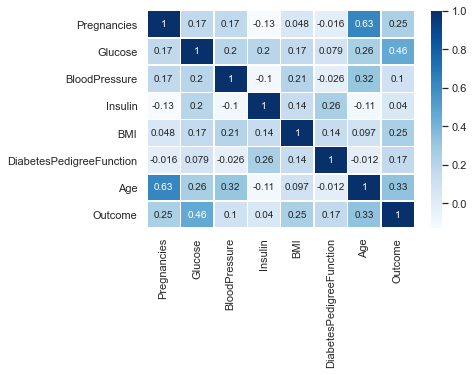

In [13]:
sns.heatmap(df.corr(), linewidth=.5, annot=True, cmap='Blues')

In [14]:
y = df['Outcome']
X = df.drop(['Outcome'], axis=1)

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=1)

In [16]:
param_dist = {
    "criterion": ["gini", "entropy"],
    "max_depth": range(1, 10),
    "min_samples_split": range(1, 10),
    "min_samples_leaf": range(1, 10)
}

In [17]:
decision_tree = DecisionTreeClassifier()
grid = GridSearchCV(decision_tree,
                   param_grid = param_dist,
                   cv=10,
                   verbose=1,
                   n_jobs=-1)

grid.fit(X_train, y_train)

Fitting 10 folds for each of 1458 candidates, totalling 14580 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    5.2s
[Parallel(n_jobs=-1)]: Done 865 tasks      | elapsed:    7.7s
[Parallel(n_jobs=-1)]: Done 4737 tasks      | elapsed:   14.6s
[Parallel(n_jobs=-1)]: Done 10337 tasks      | elapsed:   23.8s
[Parallel(n_jobs=-1)]: Done 14580 out of 14580 | elapsed:   30.1s finished


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 10),
                         'min_samples_leaf': range(1, 10),
                         'min_samples_split': range(1, 10)},
             verbose=1)

In [18]:
grid.best_params_

{'criterion': 'gini',
 'max_depth': 3,
 'min_samples_leaf': 5,
 'min_samples_split': 4}

In [28]:
df_tuned = DecisionTreeClassifier(random_state=1, criterion='entropy', max_depth=9, min_samples_leaf=4, min_samples_split=9)
df_tuned.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=9, min_samples_leaf=4,
                       min_samples_split=9, random_state=1)

In [29]:
y_pred = df_tuned.predict(X_test)

In [30]:
print("Confusion Matrix: ") 
print(confusion_matrix(y_test, y_pred))

Confusion Matrix: 
[[112   9]
 [ 16  13]]


In [31]:
print("Accuracy: " + str(accuracy_score(y_test, y_pred)))

Accuracy: 0.8333333333333334


In [32]:
print(classification_report(y_test, y_pred)) 

              precision    recall  f1-score   support

           0       0.88      0.93      0.90       121
           1       0.59      0.45      0.51        29

    accuracy                           0.83       150
   macro avg       0.73      0.69      0.70       150
weighted avg       0.82      0.83      0.82       150

